# *Homework no.5:*  

## **Exercises**

- How can you modify the units of the figures?  

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

#create your own color array (viridis)
my_colors = ["#F482D9", "#eaac47", "#e26732"]

# add color array to set_palette
sns.set(font_scale=2, style="dark", palette= my_colors)

In [3]:
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [5]:
# Path to the file to be imported
path = "C:/Users/mayte/OneDrive/Documentos/Curso_Python_Mayte/data/Terminos_lagoon_TA_DIC_2023_RawData.csv"

# Import the file
CO2Data = import_csv(path)

In [4]:
CO2Data.head()

,sample,date,estuary,area,station,layer_depth,season,chlorophy_microg_l,cond_microsiemens_cm,depth_m,...,do_mg_l,sal_psu,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data
0,CDL01S,5/3/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,...,7.12,3.56,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863,3685.0
1,CDL01F,5/3/2020,Candelaria,River,CDL01,Bottom,Dry,4.19,29886.1,7.792,...,4.90,16.97,27751.2,95.33,29.028,18.55722,-91.24990,3698,3685,NaN
2,CDL02S,5/3/2020,Candelaria,River,CDL02,Surface,Dry,0.92,16691.1,0.453,...,6.99,8.94,15429.1,5.50,29.283,18.61007,-91.24410,3724,3708,3708.0
3,CDL02F,5/3/2020,Candelaria,River,CDL02,Bottom,Dry,2.23,24847.4,1.261,...,6.52,13.87,23074.0,13.44,29.024,18.61005,-91.24403,3667,3992,3992.0
4,CDL03S,5/3/2020,Candelaria,River,CDL03,Surface,Dry,0.58,46341.6,0.465,...,6.24,28.06,43670.8,3.60,28.202,18.63166,-91.29359,2928,3023,3023.0


In [6]:
# 1) Modify units: µmol kg^-1 -> mmol kg^-1 (divide by 1000)
CO2Data = CO2Data.copy()
if 'ta_micromol_kg' in CO2Data and 'dic_micromol_kg' in CO2Data:
    CO2Data['ta_mmol_kg']  = CO2Data['ta_micromol_kg']  / 1000.0
    CO2Data['dic_mmol_kg'] = CO2Data['dic_micromol_kg'] / 1000.0

- Check the examples at https://seaborn.pydata.org/ and create your own figures. If possible, use your own data.

    1. DIC Violin Plot (µmol/kg) with Quartiles

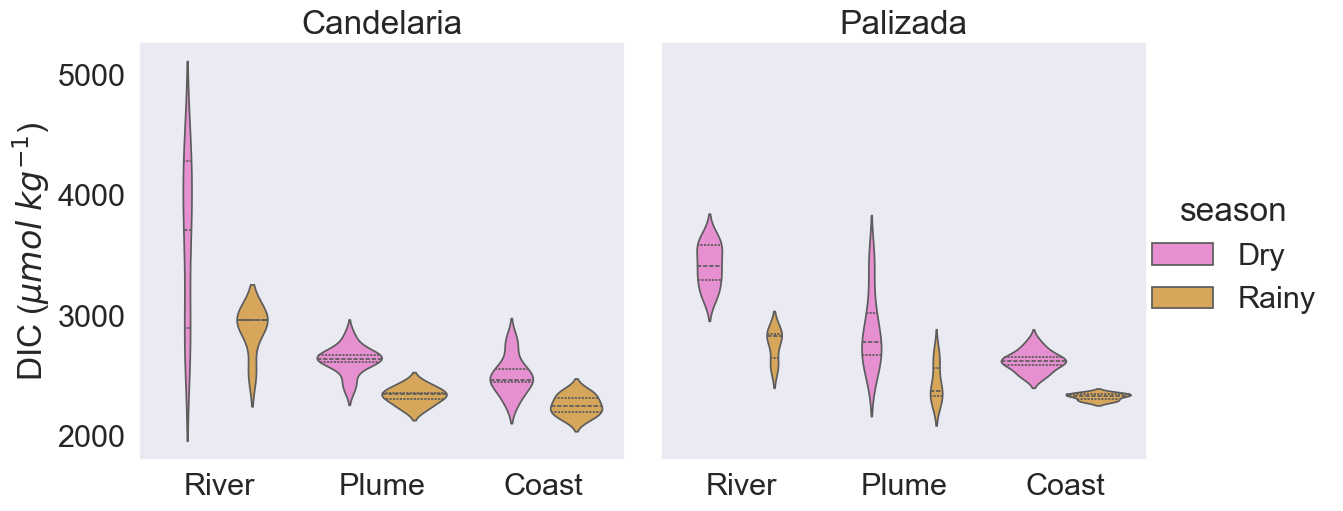

In [12]:
ax = sns.catplot(data=CO2Data, x='area', y='dic_micromol_kg',
                    hue='season', col='estuary',
                    kind='violin', inner='quartile', height=6, aspect=1)
ax.set(xlabel='', ylabel='DIC ($\mu mol \; kg^{-1}$)')
ax.set_titles(col_template='{col_name}', row_template='{row_name}')
sns.despine(top=False, right=False)
plt.show()

     2. Jointplot TA vs DIC

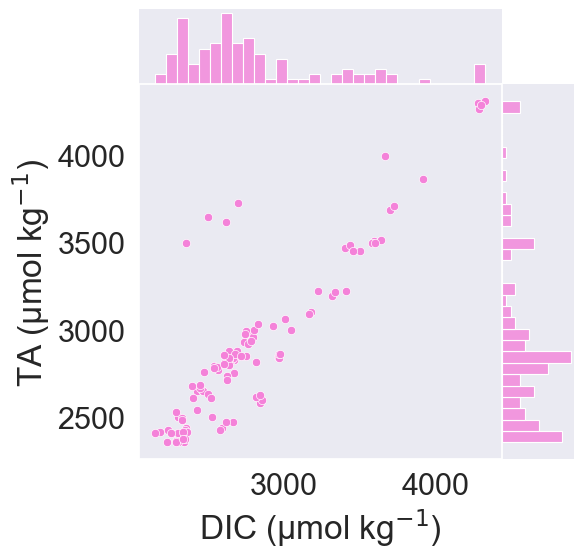

In [13]:
JP = sns.jointplot(data=CO2Data, x="dic_micromol_kg", y="ta_micromol_kg",
                kind="scatter", height=6, space=0,
                marginal_kws=dict(bins=30, fill=True, alpha=.8))
JP.set_axis_labels("DIC (µmol kg$^{-1}$)", "TA (µmol kg$^{-1}$)")
plt.show()

    3. TA (µmol/kg) vs sal_psu lmplot with regression line

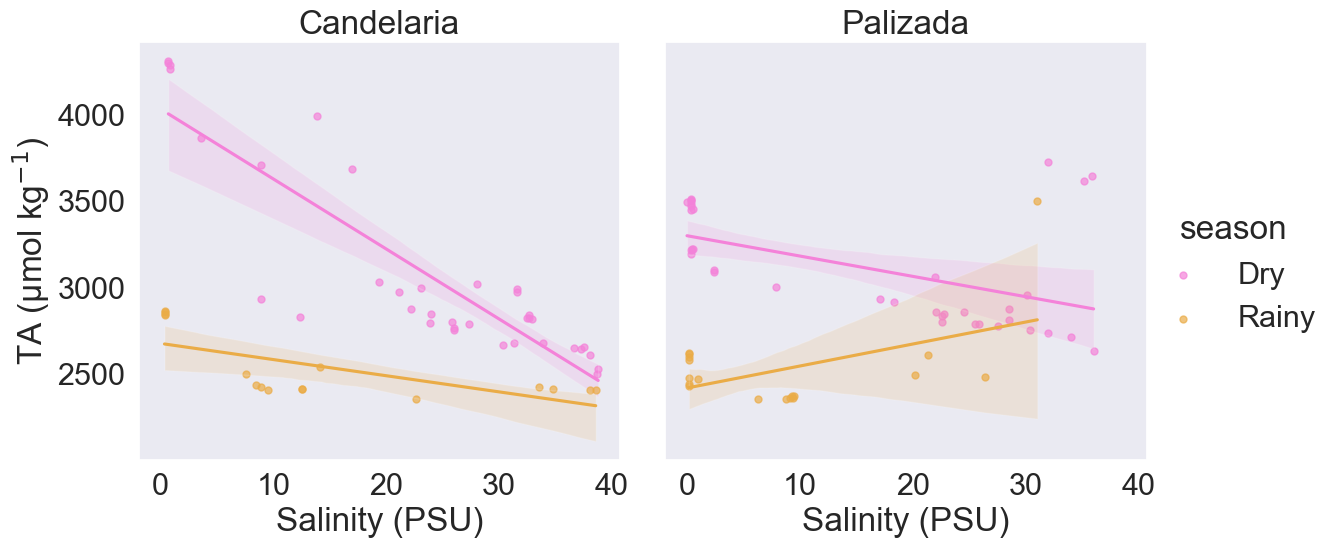

In [14]:
Imp = sns.lmplot(data=CO2Data, x='sal_psu', y='ta_micromol_kg',
                hue='season', col='estuary',
                height=6, aspect=1, scatter_kws={'s': 25, 'alpha': .7})
Imp.set(xlabel='Salinity (PSU)', ylabel='TA (µmol kg$^{-1}$)')
Imp.set_titles(col_template='{col_name}', row_template='{row_name}')
sns.despine(top=False, right=False)
plt.show()

    4. Distribution (hist + KDE) of TA by season in mmol/kg

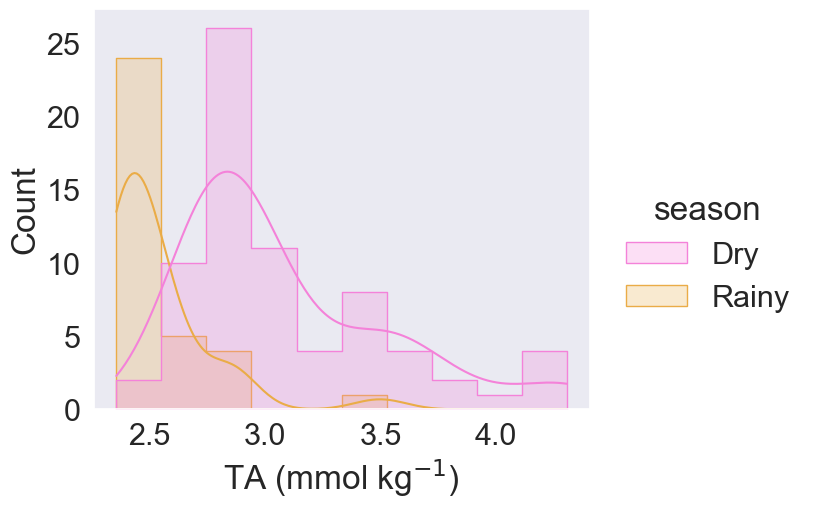

In [15]:
a2 = sns.displot(data=CO2Data, x='ta_mmol_kg', hue='season',
                kind='hist', kde=True, element='step', height=5.5, aspect=1.2)
a2.set(xlabel='TA (mmol kg$^{-1}$)', ylabel='Count')
sns.despine(top=False, right=False)
plt.show()